In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
# %load ../../loaders/imports.py
import sys, os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import pdb

# Add the root directory of this repository
sys.path.append('../..')

# Add the uoicorr directory to the path
sys.path.append('../../../uoicorr')

from utils import gen_covariance, gen_beta2, gen_data, get_cov_list
from utils import selection_accuracy
from sklearn.linear_model import LassoLars, lasso_path, LinearRegression

from pyuoi.linear_model import UoI_Lasso

In [2]:
from postprocess import postprocess_dir
from postprocess_utils import *

In [3]:
# Postprocess awkward arrays

In [4]:
ss_test = postprocess_dir('../../../data/ss_test', exp_type='UoILasso', awkward=True)

75
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
(1050, 23)


In [19]:
ss_test2 = postprocess_dir('../../../data/ss_test2', exp_type='UoIMCP', awkward=True)

75
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
(1050, 23)


In [ ]:
# Do the usual - iterate over sparsity, calculate the average covariances, and then 
# plot the average (over reps) maximum attained selection accuracy as a function of the stability selection
# parameter

In [5]:
sparsity = np.unique(ss_test['sparsity'].values)
stability_selection = np.unique(ss_test['stability_selection'].values)

In [6]:
# Maximum acheived stability_selection parameters for this set of shiteheads

In [7]:
n_features = ss_test.iloc[0]['n_features']

In [9]:
dummy = apply_df_filters(ss_test, sparsity = 0.1, stability_selection = 1.)

In [10]:
dummy.shape

(15, 23)

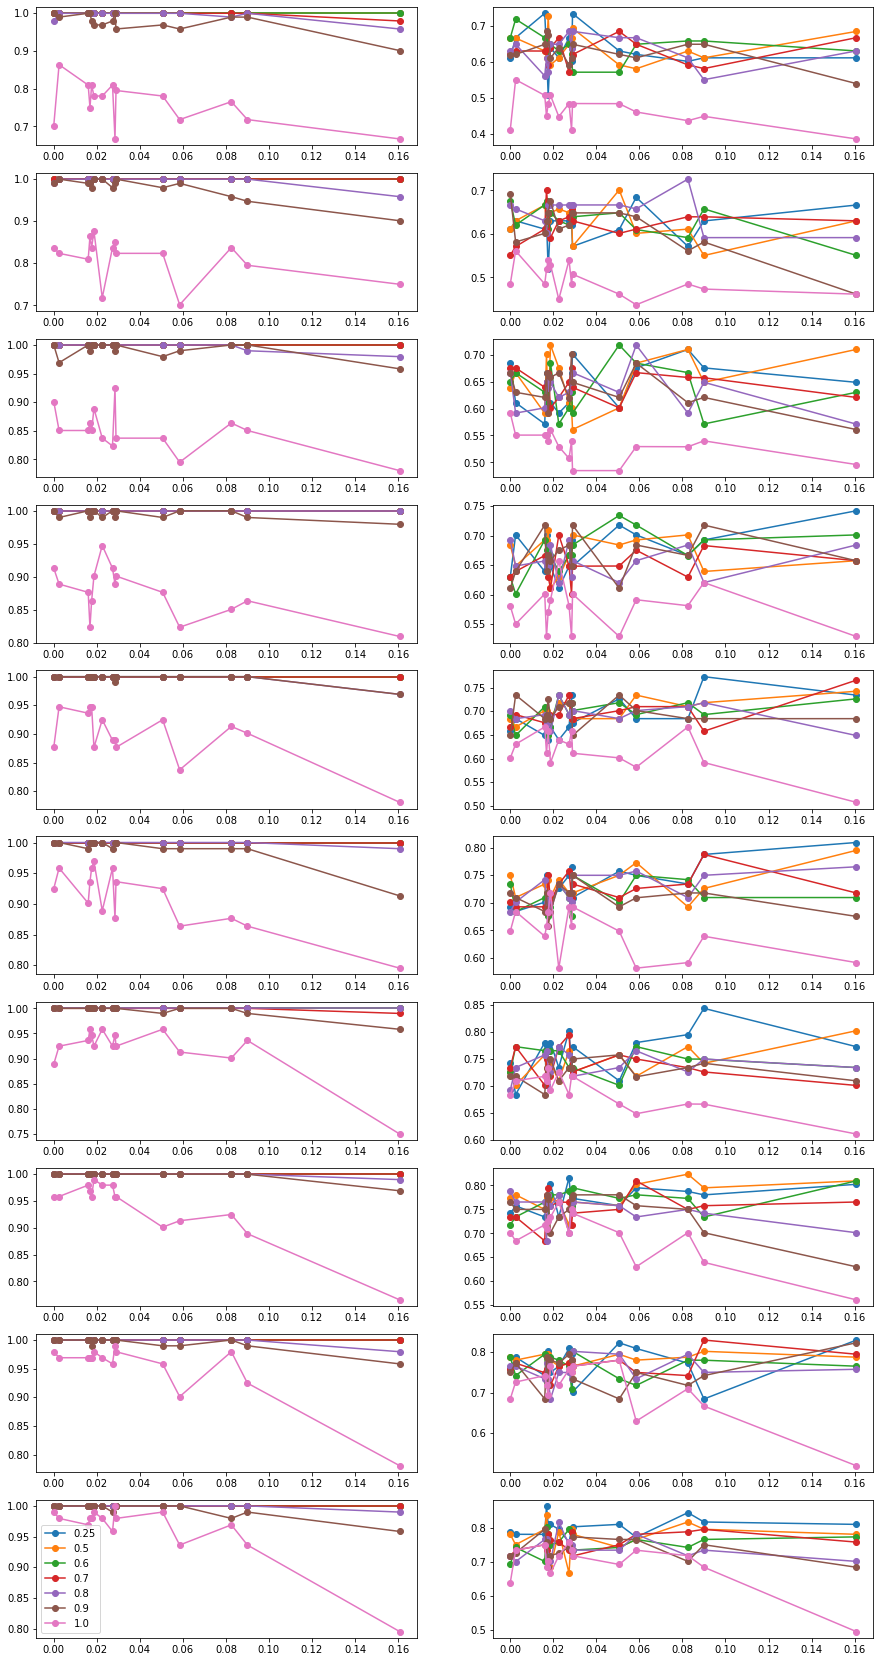

In [18]:
fig, ax = plt.subplots(sparsity.size, 2, figsize = (15, 30))

for i, s in enumerate(sparsity):

    avg_cov = np.zeros((stability_selection.size, 15))
    sa_medians = np.zeros((stability_selection.size, 15))
    sa_uq = np.zeros((stability_selection.size, 15))
    sa_lq = np.zeros((stability_selection.size, 15))    

    for j, ss in enumerate(stability_selection):
        d = apply_df_filters(ss_test, sparsity=s, stability_selection=ss)
        for k in range(d.shape[0]):
            avg_cov[j, k] = calc_avg_cov(n_features, **d.iloc[k]['cov_params'])
            beta = d.iloc[k]['betadict']['beta'].ravel()
            selaccs = selection_accuracy(beta, 1 * np.array(d.iloc[k]['coefs']))
            sa_medians[j, k] = np.median(selaccs)
            lq, uq = np.quantile(selaccs, [0.25, 1])            

            sa_uq[j, k] = uq
            sa_lq[j, k] = lq
            
        # Sort appropriately
        cov_order = np.argsort(avg_cov[j, :])
        # Separately plot the max and median selection accuracies
        ax[i, 0].plot(avg_cov[j, cov_order], sa_uq[j, cov_order], '-o')
        ax[i, 1].plot(avg_cov[j, cov_order], sa_medians[j, cov_order], '-o')
        
ax[-1, 0].legend(stability_selection)

In [ ]:
# Unsurprising here, need to re-run with UoI MCP as a comparison, and then also track the FNR, FPR, selection
# accuracy

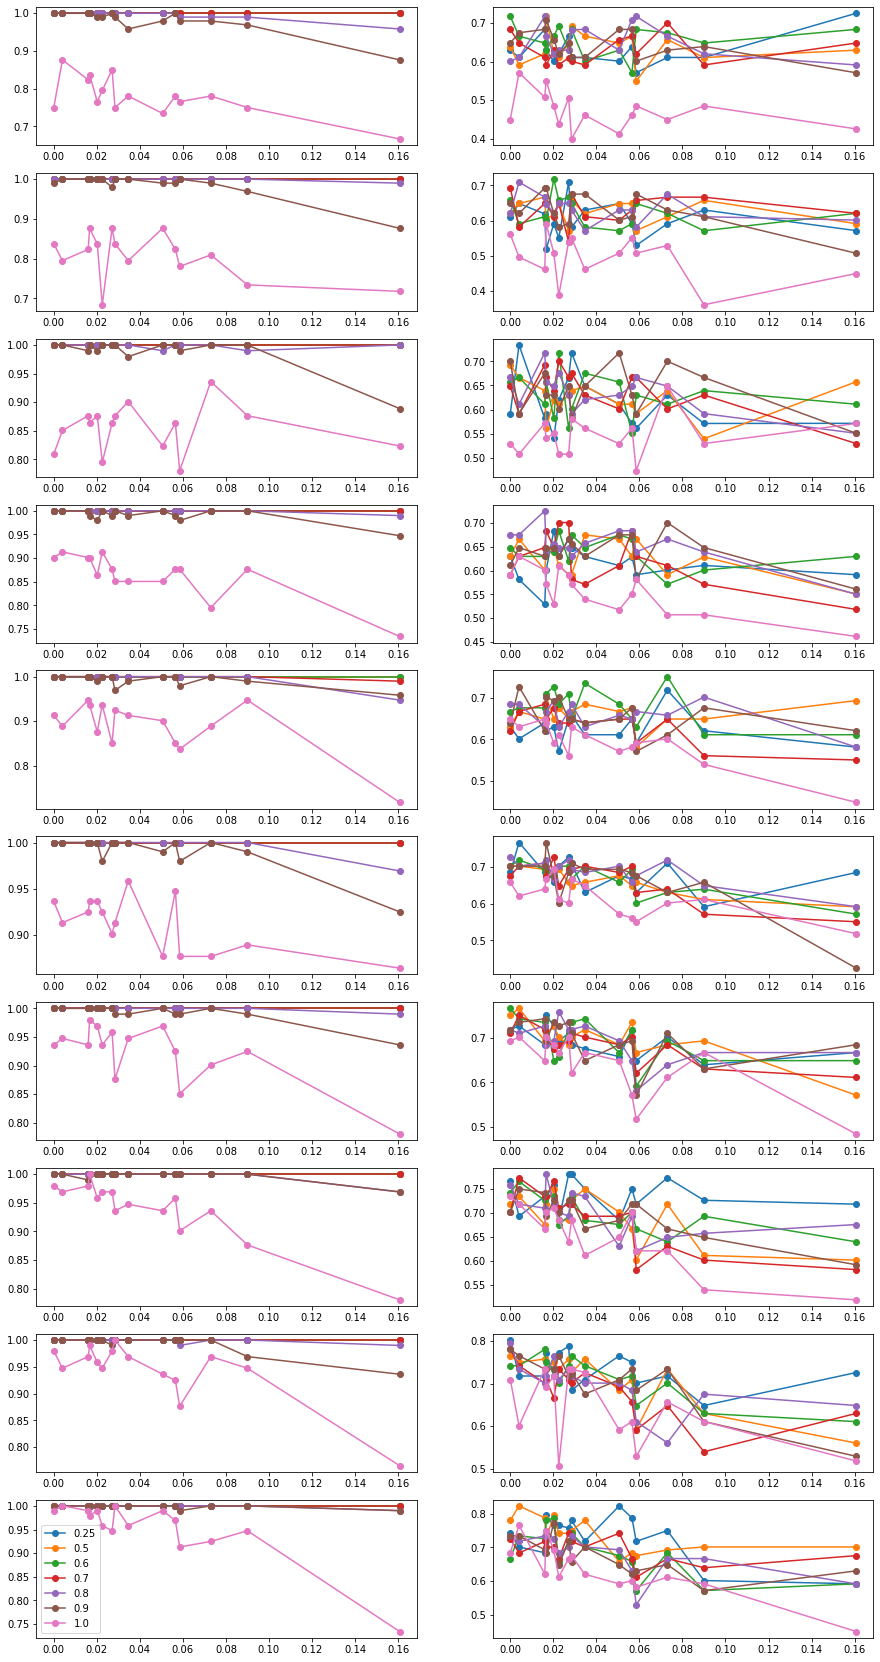

In [20]:
fig, ax = plt.subplots(sparsity.size, 2, figsize = (15, 30))

for i, s in enumerate(sparsity):

    avg_cov = np.zeros((stability_selection.size, 15))
    sa_medians = np.zeros((stability_selection.size, 15))
    sa_uq = np.zeros((stability_selection.size, 15))
    sa_lq = np.zeros((stability_selection.size, 15))    

    for j, ss in enumerate(stability_selection):
        d = apply_df_filters(ss_test2, sparsity=s, stability_selection=ss)
        for k in range(d.shape[0]):
            avg_cov[j, k] = calc_avg_cov(n_features, **d.iloc[k]['cov_params'])
            beta = d.iloc[k]['betadict']['beta'].ravel()
            selaccs = selection_accuracy(beta, 1 * np.array(d.iloc[k]['coefs']))
            sa_medians[j, k] = np.median(selaccs)
            lq, uq = np.quantile(selaccs, [0.25, 1])            

            sa_uq[j, k] = uq
            sa_lq[j, k] = lq
            
        # Sort appropriately
        cov_order = np.argsort(avg_cov[j, :])
        # Separately plot the max and median selection accuracies
        ax[i, 0].plot(avg_cov[j, cov_order], sa_uq[j, cov_order], '-o')
        ax[i, 1].plot(avg_cov[j, cov_order], sa_medians[j, cov_order], '-o')
                
ax[-1, 0].legend(stability_selection)

In [ ]:
# No discernible advantage 

In [ ]:
# Apply various selectors locally

In [21]:
from selection import UoISelector